# Assignment 1 
**Group B** \
Students: Elodie-Angélique Lendi, Mridhula Jayasankar, Clarice Jasmine Mihalache



In [36]:
# Imports cell
import pandas as pd
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

In [2]:
df = pd.read_csv("periodic_table.csv")
print(df.head()) #just for now to see if it can be loaded for everyone

   AtomicNumber Symbol       Name  AtomicMass CPKHexColor  \
0             1      H   Hydrogen    1.008000      FFFFFF   
1             2     He     Helium    4.002600      D9FFFF   
2             3     Li    Lithium    7.000000      CC80FF   
3             4     Be  Beryllium    9.012183      C2FF00   
4             5      B      Boron   10.810000      FFB5B5   

  ElectronConfiguration  Electronegativity  AtomicRadius  IonizationEnergy  \
0                   1s1               2.20         120.0            13.598   
1                   1s2                NaN         140.0            24.587   
2               [He]2s1               0.98         182.0             5.392   
3               [He]2s2               1.57         153.0             9.323   
4           [He]2s2 2p1               2.04         192.0             8.298   

   ElectronAffinity OxidationStates StandardState  MeltingPoint  BoilingPoint  \
0             0.754          +1, -1           Gas         13.81         20.28   
1 

## Problem 2

## Problem 3

### Simulation /Modeling

### 1. Monte-Carlo $\pi$ estimation

The aim of this code is to write a function `estimate_pi` that uses Monte-Carlo simulation to estimate the value of $\pi$. 
In order to do this, the function shoots $N$ random points uniformly inside a square of side 2 (x and y from -1 to 1), counts how many points fall inside the unit circle (distance ≤ 1 from origin). Considering the ratio between area of the circle and that of the square to be equal to that between the total number of points $N$ and those in the circle, we find an estimated value of $\pi$.Then, we can use this function to estimate $\pi$ value for different $N$ values. 

In [14]:
def estimate_pi(num_points_N):
    num_inside_circle = 0
    for i in range(num_points_N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        if ((x**2)+(y**2))<=1 :
            num_inside_circle += 1
    
    pi_estimation = 4 * (num_inside_circle)/(num_points_N)

    return pi_estimation

print(f"The estimated value of pi is : {estimate_pi(10**7)}")

The estimated value of pi is : 3.141464


Our function appears to give a value close to $\pi$ for the first few decimal places, but it is not very accurate, as we will see below with the `convergence graph` as a function of $N$. Here, we will test the value we obtain by averaging 10 estimated values of $\pi$. However, even if we obtain a value that is closer to $\pi$, this estimate is still not ideal. Indeed, it is possible that all 10 samples we take are higher than the actual value of $\pi$ (since we are using random functions). For this idea to be fully effective, the number of samples (the number of times we apply the `estimate_pi` function for a given value of $N$) would have to tend towards infinity. As we will see in the graph below, another way to improve the estimate is to increase the number of $N$.

In [ ]:
def average_pi_value(num_running, num_points_N):

    pi_values = []
    pi_values.append(estimate_pi(num_points_N))

    pi_mean_value = statistics.mean(pi_values)
    
    print(f"Pi mean value for {num_running} iterations of the function is {pi_mean_value}")
    
average_pi_value(10, 10**6)


Pi mean value for 10 iterations of the function is 3.141544


The next step is to visualise the error of this method/estimation based on the number of points $N$ that we have. To do so, we can plot the graph of the estimated $\pi$ as a function of the number of random points N that we use in the simulation. We can do this in different ways. One way is to generate random values for $N$, then test the function on these values and create a graph with them. Another method would be to record a point every 1,000 iterations for N (called `step` in `plot_convergence`), for example, and plot the corresponding value on the graph to see the convergence. In this second method, the user can also introduce the "step", so the gap they want between the points. The true value of $\pi$ is also shown on the graph in order to better visualise the deviation of the estimate from it. In the function below, the second method described above has been chosen.

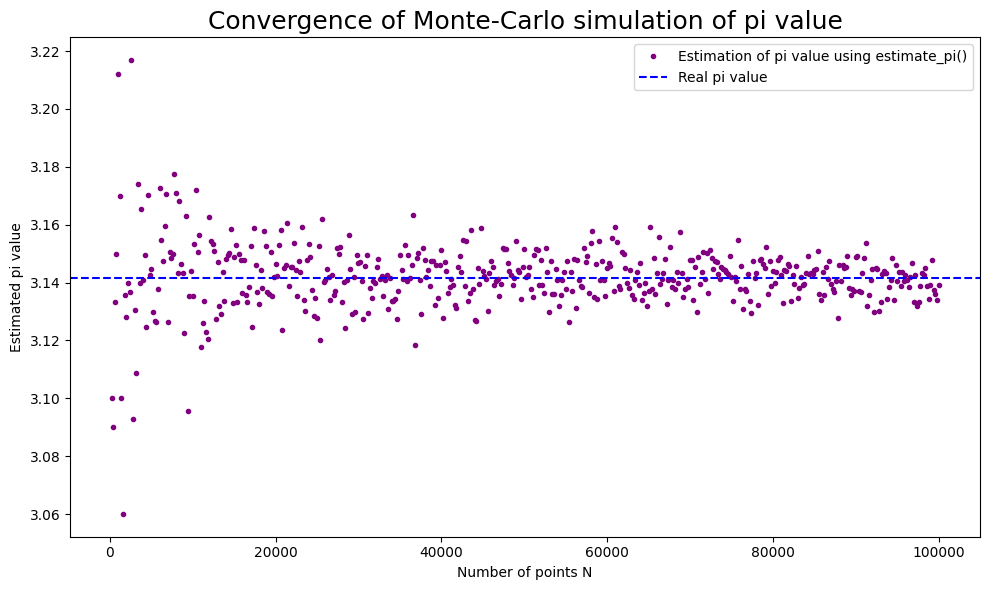

In [78]:
def plot_convergence(num_points_N, step):
    # x-values
    N_values = list(range(step, num_points_N+1, step))
    #y-values
    pi_estimated_values = []

    for i in N_values:
        pi_estimated_values.append(estimate_pi(i))

    # Graph parameters
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, pi_estimated_values, linestyle = '', marker = '.', color = 'purple', label = 'Estimation of pi value using estimate_pi()')
    plt.axhline(y= np.pi, color='b', linestyle ='--', label = 'Real pi value')
    plt.legend()
    plt.title(f"Convergence of Monte-Carlo simulation of pi value", size = 18)
    plt.xlabel("Number of points N")
    plt.ylabel("Estimated pi value", )
    plt.tight_layout()
    plt.show()


plot_convergence(10**5, 200)



### 2. Chemistry-inspired Monte-Carlo
The goal of this second part is to simulate $M$ random molecular collisions in a box, then to assign random energies to each collision (e.g., uniform or normal distribution) and to count how many collisions exceed a given threshold energy. Finally, we interpret the fraction as an estimate of reaction probability.\
In other words, we introduce the number of collisions into our system as well as the energy threshold above which we consider there to be sufficient energy for the reaction to occur. By randomly assigning energy to each of these collisions using normal, uniform, Poisson, etc. distributions and counting how many of them are above the threshold, we can determine the probability that the reaction will occur. This corresponds to the number of collisions with sufficient energy divided by the total number of collisions.\

In this simple model only energies are considered.To complicate the problem further, we could also have considered the positions and dynamics of the particles in the box. This introduces additional parameters to determine whether the particles will react with each other or not, such as the distance between them, etc.

In [73]:
def collisions_uniform_dist(num_collisions: int, energy_threshold: float):

    energy_collisions = np.random.uniform(0, 1, num_collisions)
    collisions_above_treshhold = sum(energy_collisions >= energy_threshold)

    probability = collisions_above_treshhold/num_collisions

    print(f"The probability of having a collision is {probability}")

    # Plotting graph of the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(energy_collisions, bins=50, color='thistle', edgecolor='black', alpha=0.7, density=True)
    plt.axvline(energy_threshold, color='hotpink', linestyle='--', linewidth=2, label=f'Threshold = {energy_threshold:.2f}')
    plt.title(f'Energy distribution of collisions uniform; Probability of collision: {probability:.4f}', size = 16)
    plt.xlabel('Energy')
    plt.ylabel('Probability density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return probability

The probability of having a collision is 0.2913


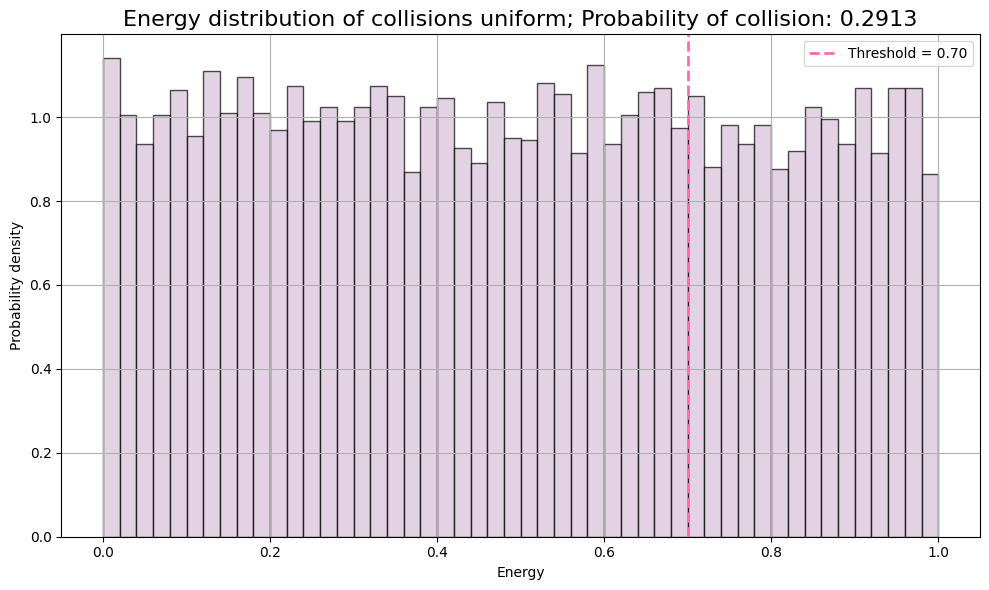

np.float64(0.2913)

In [74]:
collisions_uniform_dist(10000, 0.7)

To complete...

In [75]:
def collisions_normal_dist(num_collisions: int, energy_threshold: float):

    energy_collisions = np.random.normal(0, 1, num_collisions)
    collisions_above_treshhold = sum(energy_collisions >= energy_threshold)

    probability = collisions_above_treshhold/num_collisions

    print(f"The probability of having a collision is {probability}")

    # Plotting graph of the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(energy_collisions, bins=50, color='thistle', edgecolor='black', alpha=0.7, density=True)
    plt.axvline(energy_threshold, color='hotpink', linestyle='--', linewidth=2, label=f'Threshold = {energy_threshold:.2f}')
    plt.title(f'Energy distribution of collisions normal; Probability of collision: {probability:.4f}', size = 16)
    plt.xlabel('Energy')
    plt.ylabel('Probability density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return probability

The probability of having a collision is 0.2534


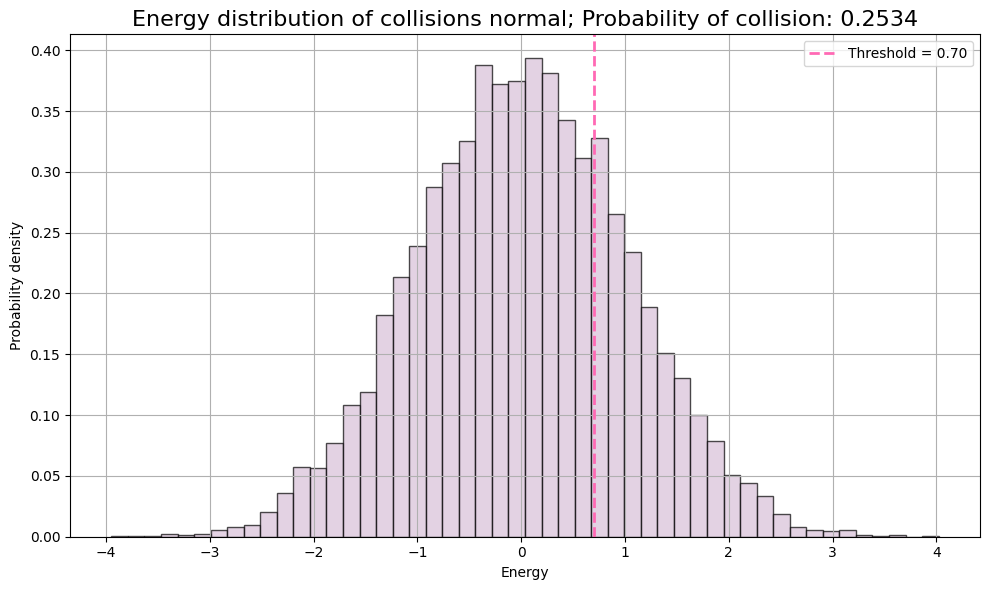

np.float64(0.2534)

In [76]:
collisions_normal_dist(10000, 0.7)